<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
from sympy import init_session,Matrix
import tensorflow as tf
from skimage import data as sc_data
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras import layers
from tensorflow import keras
plt.rcParams['image.cmap']='gray'
#%matplotlib inline
tf.random.set_seed(100)
plt.ion()

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

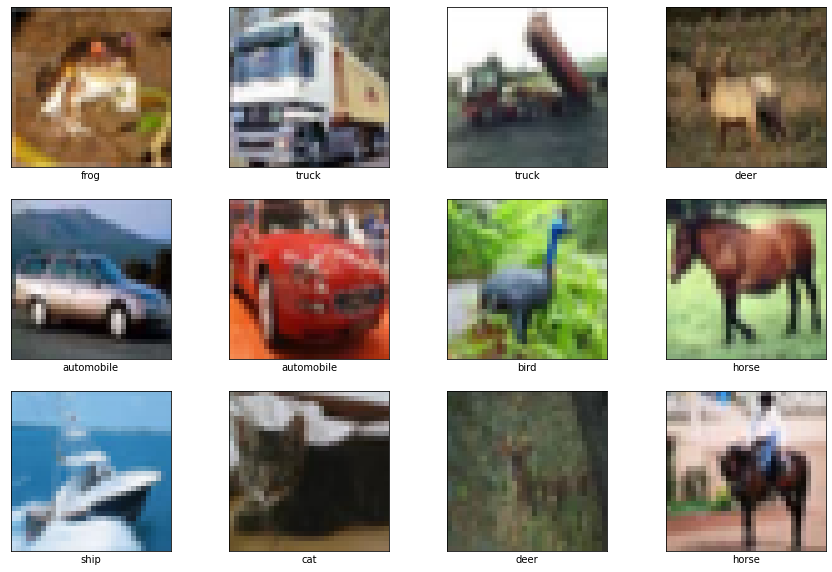

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15,10))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [6]:
train_images[1].shape

(32, 32, 3)

defining the model

In [7]:
keras.backend.clear_session()

In [8]:
inputs = tf.keras.Input(shape=(32,32,3 ))
x=layers.Conv2D(filters=96, padding='same',kernel_size=3)(inputs)
x=layers.BatchNormalization()(x)
x=layers.Activation('relu')(x)
x=layers.MaxPool2D(pool_size=3,strides=2)(x)

x=layers.Conv2D(filters=38,kernel_size=3,padding='same')(x)
x=layers.BatchNormalization()(x)
x=layers.Activation('relu')(x)
x=layers.MaxPool2D(pool_size=2,strides=2)(x)

x=layers.Conv2D(filters=38,kernel_size=3,padding='same')(x)
x=layers.BatchNormalization()(x)
x=layers.Activation('relu')(x)
x=layers.MaxPool2D(pool_size=2,strides=2)(x)

x=layers.Flatten()(x)
x=layers.Dense(40)(x)
x=layers.BatchNormalization()(x)
x=layers.Activation('relu')(x)

x=layers.Dense(40,activation='relu')(x)
x=layers.Dropout(0.5)(x)
outputs=layers.Dense(10,activation='softmax')(x)
model=tf.keras.Model(inputs=[inputs],outputs=[outputs])

Compile the model and train it

In [43]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

In [44]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 96)        2688      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 96)       384       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 38)        32870 

In [45]:
history = model.fit(train_images, train_labels, epochs=15, batch_size=100,
                    validation_data=(test_images, test_labels))

Epoch 1/15
500/500 [==============================] - 250s 495ms/step - loss: 1.6754 - accuracy: 0.3963 - val_loss: 2.1566 - val_accuracy: 0.2677
Epoch 2/15
500/500 [==============================] - 253s 505ms/step - loss: 1.2337 - accuracy: 0.5725 - val_loss: 1.6973 - val_accuracy: 0.4300
Epoch 3/15
500/500 [==============================] - 248s 496ms/step - loss: 1.0795 - accuracy: 0.6318 - val_loss: 1.1852 - val_accuracy: 0.5902
Epoch 4/15
500/500 [==============================] - 274s 548ms/step - loss: 0.9920 - accuracy: 0.6668 - val_loss: 1.0930 - val_accuracy: 0.6146
Epoch 5/15
500/500 [==============================] - 249s 498ms/step - loss: 0.9263 - accuracy: 0.6892 - val_loss: 1.0743 - val_accuracy: 0.6336
Epoch 6/15
500/500 [==============================] - 262s 525ms/step - loss: 0.8776 - accuracy: 0.7055 - val_loss: 0.8962 - val_accuracy: 0.6915
Epoch 7/15
500/500 [==============================] - 328s 656ms/step - loss: 0.8351 - accuracy: 0.7229 - val_loss: 1.2041 -

In [46]:
test_loss, test_acc=model.evaluate(test_images,test_labels)

313/313 [==============================] - 14s 45ms/step - loss: 0.8651 - accuracy: 0.7120


In [47]:
test_acc

0.7120000123977661

In [48]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

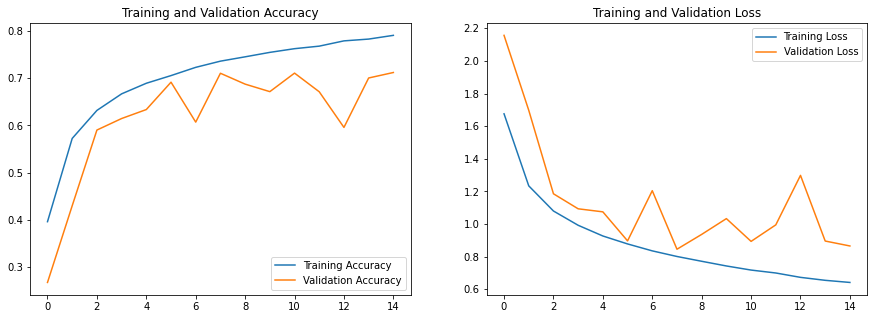

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()